# 비선형 데이터를 선형모델로 예측하기
### 다항회귀
- n승 데이터 필드를 추가하여 선형 모델 학습하는 방법
- PolynomialFeatures

In [9]:
import numpy as np

m= 100
X= 6*np.random.rand(m,1) - 3
y= 0.5* X**2 + X + 2 +np.random.randn(m,1)

In [2]:
from sklearn.preprocessing import PolynomialFeatures
# degree: 몇 승(차)항까지 추가할 것인가
poly_features= PolynomialFeatures(degree=2, include_bias=False)
X_poly= poly_features.fit_transform(X)

#X_poly: X와 X의 제곱항을 특성으로 추가
print(X[0], X_poly[0])

[-0.76160513] [-0.76160513  0.58004237]


In [3]:
from sklearn.linear_model import LinearRegression 
lin_reg= LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

#실제: 0.5X^2+ X + 2 + 가우시안 잡음
#모델: coef_[0]X^2+ coef_[1]X +intercept_

(array([1.95484602]), array([[0.99891227, 0.51991486]]))

# 일반화 성능 확인하기
### 교차검증
- 훈련데이터에서는 성능이 좋고, 교차 검증 점수가 나쁘다면 과대적합
- 양쪽에서 모두 나쁘다면 과소적합

### 학습곡선
- 훈련세트와 검증세트의 모델성능 함수 비교

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors= [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict= model.predict(X_train[:m])
        y_val_predict= model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+", linewidth=2, label="훈련 세트")
    plt.plot(np.sqrt(val_errors),"b-", linewidth=4, label="검증 세트")

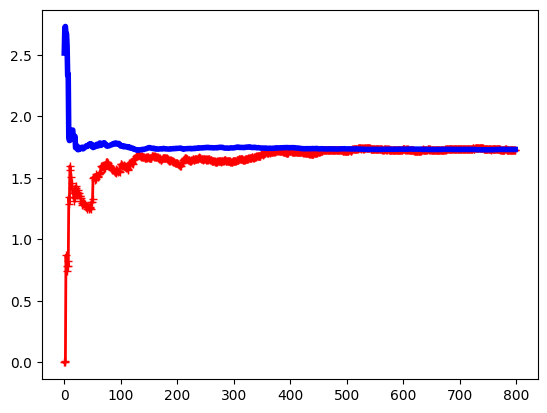

In [5]:
lin_reg= LinearRegression()
plot_learning_curve(lin_reg, X, y)

# 과소 적합 그래프 특징
# 검증 성능이 더 좋고, 데이터가 추가되어도 두 그래프 차이가 줄어들지않는다.
# 복잡한 모델, 더 나은 특성을 선택해야함

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curve(polynomial_regression, X, y)
# 과대적합 특징
# 훈련데이터의 오차가 선형 회귀모델보다 훨씬 낮고, 검증 오차보다도 훨씬 낮음

# 규제적용
### 릿지 회귀
- 선형회귀 비용함수에 alpha * Norm2 규제항 추가
    - J 야코비안 행렬: 각 가중치에 대한 도함수 행렬
    - J(x)= MSE(x)+a * sum(|x|^2)
- 규제항은 훈련중에만, 편향 제외한 가중치에만 적용됨
- 이 릿지회귀 또한 정규방정식 또는 경사하강법으로 가중치 행렬 구할 수 있음
    - 행렬분해 - cholesky
- sklearn.linear_model의 Ridge
    - penalty에 사용할 규제 지정

In [10]:
from sklearn.linear_model import Ridge

ridge_reg= Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.18123871]])

In [11]:
from sklearn.linear_model import SGDRegressor

sed_reg= SGDRegressor(penalty='l2')
sed_reg.fit(X, y)
sed_reg.predict([[1.5]])

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([5.16919657])

### 라쏘 회귀

### 엘라스틱넷

# 조기종료